# Notebook for EDA Work

In [4]:
# Standard Packages
import pandas as pd
import numpy as np

# Notebook Settings
## Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Display Settings
pd.options.display.max_columns = None
pd.options.display.width = None

In [5]:
# Import King County Housing Sales Data
house_data_df = pd.read_csv('../data/kc_house_data.csv')

In [6]:
# Inspect Housing Data
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [7]:
# Let's add a describe here
house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [8]:
# Check for Missing Values and Dtypes
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [9]:
# Drop the handful of rows missing values for 'heat_source' & 'sewer_system'
house_data_df = house_data_df.dropna()
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [10]:
# Drop id column
house_data_df = house_data_df.drop(columns='id',axis=1)
house_data_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [11]:
# Check yr_renovated column
house_data_df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

In [12]:
# Convert yr_renovated to boolean column titled renovated
house_data_df['renovated'] = house_data_df['yr_renovated'].astype('bool')
house_data_df['renovated'].value_counts()

False    28743
True      1368
Name: renovated, dtype: int64

In [13]:
# Drop yr_renovated and convert boolean values to int
house_data_df = house_data_df.drop(columns='yr_renovated')
house_data_df['renovated'] = house_data_df['renovated'].astype(int)
house_data_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,renovated
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0


In [14]:
# Convert date column to datetime and extract month and year
house_data_df['date'] = pd.to_datetime(house_data_df['date'], format='%m/%d/%Y')

house_data_df['month'] = house_data_df['date'].dt.month
house_data_df['year'] = house_data_df['date'].dt.year

# Delete origninal date column
house_data_df = house_data_df.drop(columns='date')
house_data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,renovated,month,year
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,5,2022
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,12,2021
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,9,2021
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,12,2021
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,0,11,2021
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,0,6,2021
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,0,5,2022
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,0,2,2022


In [15]:
# Create new df column to hold extracted zip codes and drop address
house_data_df['zip'] = house_data_df['address'].str[-20:-15]
house_data_df = house_data_df.drop(columns='address', axis = 1)

In [16]:
# Check zip code unique values
house_data_df['zip'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
67846      1
56364      1
60411      1
66503      1
99705      1
Name: zip, Length: 399, dtype: int64

In [17]:
# Import zip code data from county website to filter incorrect data out
kc_zip_codes = pd.read_csv('../data/king-co-zip-table.csv')
kc_zip_codes

,ZIPCODE,COUNTY,COUNTY_NAME,PREFERRED_CITY
0,98001,33,King County,AUBURN
1,98002,33,King County,AUBURN
2,98003,33,King County,FEDERAL WAY
3,98004,33,King County,BELLEVUE
4,98005,33,King County,BELLEVUE
...,...,...,...,...
204,98940,37,Kittitas County,RONALD
205,98941,37,Kittitas County,ROSLYN
206,98943,37,Kittitas County,SOUTH CLE ELUM
207,98946,37,Kittitas County,THORP


In [18]:
# Count unique zip codes
kc_zip_codes.nunique()

ZIPCODE           198
COUNTY              6
COUNTY_NAME         6
PREFERRED_CITY     98
dtype: int64

In [19]:
# Convert 'ZIPCODE' to string and store in list
zip_str_list = kc_zip_codes['ZIPCODE'].astype(str)

In [20]:
# Compare county zip list to housing sales df and remove rows containg erroneous address info
mask = house_data_df['zip'].isin(zip_str_list)
house_data_df = house_data_df[mask]
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29198 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29198 non-null  float64
 1   bedrooms       29198 non-null  int64  
 2   bathrooms      29198 non-null  float64
 3   sqft_living    29198 non-null  int64  
 4   sqft_lot       29198 non-null  int64  
 5   floors         29198 non-null  float64
 6   waterfront     29198 non-null  object 
 7   greenbelt      29198 non-null  object 
 8   nuisance       29198 non-null  object 
 9   view           29198 non-null  object 
 10  condition      29198 non-null  object 
 11  grade          29198 non-null  object 
 12  heat_source    29198 non-null  object 
 13  sewer_system   29198 non-null  object 
 14  sqft_above     29198 non-null  int64  
 15  sqft_basement  29198 non-null  int64  
 16  sqft_garage    29198 non-null  int64  
 17  sqft_patio     29198 non-null  int64  
 18  yr_bui

In [ ]:
# Export Dataset for Baseline Modeling
house_data_df.to_csv("../data/house_data_df.csv",index=False)

In [ ]:
plt.hist(house_data_df['price'], bins=30, density=True, alpha=0.5)

# Add a title and axis labels
plt.title('Distribution of Sale Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 10000000)
fmt = '${x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)

# Display the plot
plt.show()

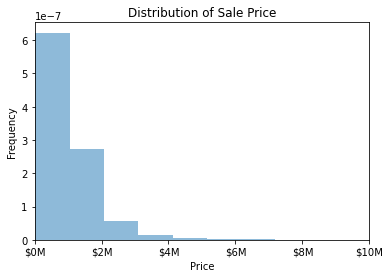

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a histogram of house price data
plt.hist(house_data_df['price'], bins=30, density=True, alpha=0.5)

# Set the title and axis labels
plt.title('Distribution of Sale Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set x-axis labels to show in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '${:.0f}M'.format(x * 1e-6)

tick = mtick.FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(tick)

# Set the x-axis limit to 10,000,000
plt.xlim(0, 10000000)

# Display the plot
plt.show()